In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, Activation, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
path ='/content/Image'

train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, target_size=(32, 32), batch_size=4400, class_mode=None)


Found 1000 images belonging to 2 classes.


In [ ]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128 ) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(1000, 32, 32, 1)
(1000, 32, 32, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
# model.add(Dropout(0.5))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
model.summary()

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile( loss='mse' , metrics=['accuracy'])

In [ ]:
model.fit(X,Y,validation_split=0.1, epochs=200, batch_size=1000)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.3337 - accuracy: 0.4007 - val_loss: 0.6871 - val_accuracy: 0.4035
Epoch 2/200
1/1 [==============================] - 0s 289ms/step - loss: 0.7190 - accuracy: 0.4171 - val_loss: 0.2590 - val_accuracy: 0.3939
Epoch 3/200
1/1 [==============================] - 0s 290ms/step - loss: 0.3978 - accuracy: 0.4083 - val_loss: 0.0237 - val_accuracy: 0.3955
Epoch 4/200
1/1 [==============================] - 0s 293ms/step - loss: 0.0666 - accuracy: 0.4076 - val_loss: 0.0076 - val_accuracy: 0.6136
Epoch 5/200
1/1 [==============================] - 0s 292ms/step - loss: 0.0086 - accuracy: 0.4473 - val_loss: 0.0076 - val_accuracy: 0.6137
Epoch 6/200
1/1 [==============================] - 0s 293ms/step - loss: 0.0081 - accuracy: 0.5501 - val_loss: 0.0076 - val_accuracy: 0.6137
Epoch 7/200
1/1 [==============================] - 0s 294ms/step - loss: 0.0080 - accuracy: 0.5983 - val_loss: 0.0076 - val_accuracy: 0.6137
Epoch 8/200
1/1 

In [ ]:
model.save('/content/Model/Colourizer2(Ship).model')

INFO:tensorflow:Assets written to: /content/Model/Colourizer2(Ship).model/assets


Epoch 1/300
9/9 [==============================] - 1s 62ms/step - loss: 0.0073 - accuracy: 0.5942 - val_loss: 0.0074 - val_accuracy: 0.6137
Epoch 2/300
9/9 [==============================] - 0s 38ms/step - loss: 0.0073 - accuracy: 0.5994 - val_loss: 0.0068 - val_accuracy: 0.6137
Epoch 3/300
9/9 [==============================] - 0s 39ms/step - loss: 0.0071 - accuracy: 0.5976 - val_loss: 0.0069 - val_accuracy: 0.6137
Epoch 4/300
9/9 [==============================] - 0s 39ms/step - loss: 0.0071 - accuracy: 0.5989 - val_loss: 0.0070 - val_accuracy: 0.5734
Epoch 5/300
9/9 [==============================] - 0s 38ms/step - loss: 0.0073 - accuracy: 0.5900 - val_loss: 0.0068 - val_accuracy: 0.6137
Epoch 6/300
9/9 [==============================] - 0s 39ms/step - loss: 0.0073 - accuracy: 0.5994 - val_loss: 0.0068 - val_accuracy: 0.6137
Epoch 7/300
9/9 [==============================] - 0s 38ms/step - loss: 0.0070 - accuracy: 0.5994 - val_loss: 0.0075 - val_accuracy: 0.6137
Epoch 8/300
9/9 [===

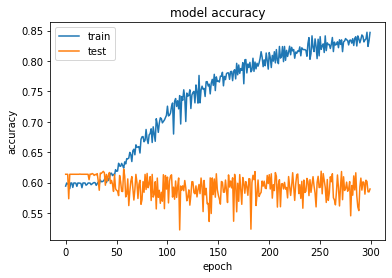

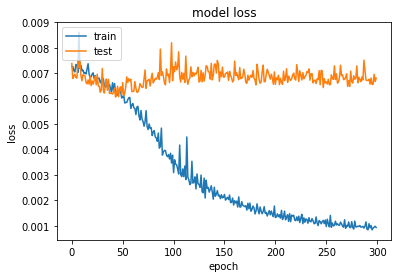

In [ ]:
history = model.fit(X,Y,validation_split=0.1, epochs=300, batch_size=100)

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def predict(filename):
  img1_color=[]
  img1=img_to_array(load_img(filename))
  img1 = resize(img1 ,(128,128))
  img1_color.append(img1)
  img1_color = np.array(img1_color, dtype=float)
  img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
  img1_color = img1_color.reshape(img1_color.shape+(1,))
  output1 = model.predict(img1_color)
  output1 = output1*128
  result = np.zeros((128, 128, 3))
  result[:,:,0] = img1_color[0][:,:,0]
  result[:,:,1:] = output1[0]
  img= load_img(filename)
  img2 = lab2rgb(result)
  Titles =["Original", "Prediction"]
  images =[img, img2]
  count = 2
  
  for i in range(count):
      plt.subplot(1, 2, i + 1)
      plt.title(Titles[i])
      plt.imshow(images[i])
  
  plt.show()

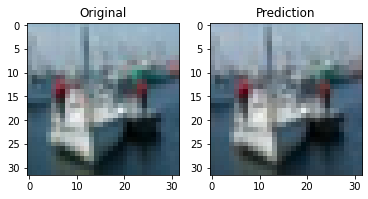

In [ ]:
predict('/content/Images/img/0122.png')

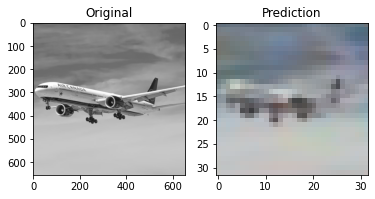

In [ ]:
predict('/content/Images/img/imageonline-co-blackandwhiteimage.jpg')

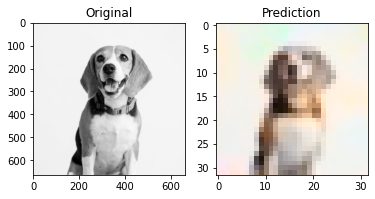

In [ ]:
predict('/content/Imaghes/imageonline-co-blackandwhiteimage (1).jpg')

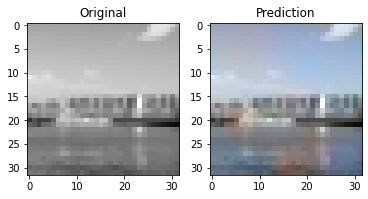

In [ ]:
predict('/content/Images/test/boat.jpg')

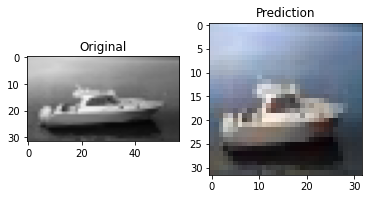

In [ ]:
predict('/content/Images/test/imageonline-co-(1) (1).jpg')

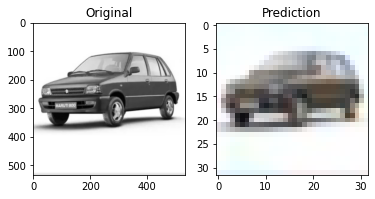

In [ ]:
predict('/content/Images/test/imageonline-co-(2).jpg')

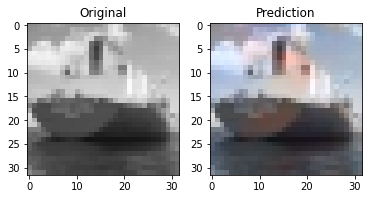

In [ ]:
predict('/content/Images/test/shhhiipp.jpg')

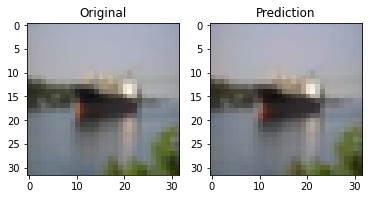

In [ ]:
predict('/content/Images/img/0056.png')